# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

# ✈️ Análisis de Retrasos en Vuelos (Flights Delay Analysis)

Este notebook presenta un análisis exploratorio de datos (EDA) de vuelos domésticos en EE. UU. durante el año 2013. Se utilizan técnicas de limpieza, estadísticas descriptivas y visualización vistas en la clase del Prof. Ing. Cesar Jaime Montiel Moctezuma utilizando estas tecnicas para responder preguntas clave sobre los factores que influyen en los retrasos de salida y llegada.

**Objetivo**: Analizar si existen patrones o factores que afectan la puntualidad de los vuelos, como el día de la semana, la aerolínea o el aeropuerto de origen.


In [ ]:
##  Carga de datos

#Se utiliza `pandas` para cargar el dataset `flights.csv`. 
# Este contiene información detallada de cada vuelo: fechas, horarios, aeropuertos, aerolíneas, retrasos en salida 
# (`DepDelay`) y llegada (`ArrDelay`), entre otros.

import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

# Crear columna ArrDelay15 si no existe
df_flights["ArrDelay15"] = df_flights["ArrDelay"] > 15
df_flights["ArrDelay15"] = df_flights["ArrDelay15"].astype(int)


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    R - Identify any null or missing data, and impute appropriate replacement values.
    R - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    R - View summary statistics for the numeric fields in the dataset.
    R - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        R - *What are the average (mean) departure and arrival delays?*
        R - *How do the carriers compare in terms of arrival delay performance?*
        R - *Is there a noticable difference in arrival delays for different days of the week?*
        R - *Which departure airport has the highest average departure delay?*
        * - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        * - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        R - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.


In [ ]:
# Eliminar filas vacías
df_flights = df_flights.dropna()

# Eliminar outliers de columnas de retraso
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

#Elimine valores extremos de retrasos muy grandes usando metodo IQR
# (rango intercualitico) esto paraa normalizar los datos.
df_flights = remove_outliers(df_flights, "DepDelay")
df_flights = remove_outliers(df_flights, "ArrDelay")


Promedio de retraso en salida: 0.22028920809152422
Promedio de retraso en llegada: -4.559815481036037

Retraso promedio por aerolínea:
Carrier
9E   -7.760876
AA   -5.542300
AS   -4.289714
B6   -5.752740
DL   -6.289022
EV   -6.637236
F9   -0.097512
FL   -3.334213
HA   -2.540211
MQ   -3.931003
OO   -4.014236
UA   -7.654712
US   -3.995503
VX   -5.269559
WN   -1.284512
YV   -3.710125
Name: ArrDelay, dtype: float64

Retraso promedio por día de la semana (en minutos):
DayOfWeek
Monday      -4.414799
Tuesday     -5.197335
Wednesday   -4.361467
Thursday    -3.313221
Friday      -3.856834
Saturday    -5.950077
Sunday      -5.030415
Name: ArrDelay, dtype: float64


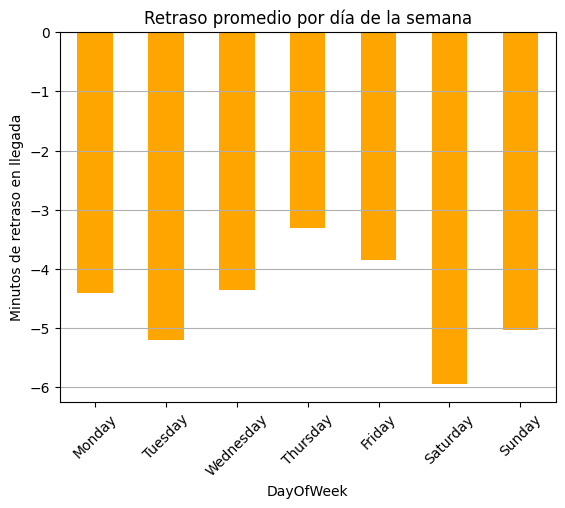


Aeropuerto con mayor retraso promedio de salida:
Chicago Midway International


In [ ]:
## Estadísticas generales

#Se calculan los promedios de retraso en salida y llegada.
#  También se analiza el rendimiento de cada aerolínea (`Carrier`) 
# y el comportamiento de los retrasos según el **día de la semana** (`DayOfWeek`).


print("Promedio de retraso en salida:", df_flights["DepDelay"].mean())
print("Promedio de retraso en llegada:", df_flights["ArrDelay"].mean())

print("\nRetraso promedio por aerolínea:")
print(df_flights.groupby("Carrier")["ArrDelay"].mean())

#print("\nRetraso promedio por día de la semana:")
#print(df_flights.groupby("DayOfWeek")["ArrDelay"].mean())

import calendar

# Crear etiquetas con nombres de días
dias_semana = {i: calendar.day_name[i-1] for i in range(1, 8)}

# Agrupar y convertir el índice numérico a nombre de día
delay_por_dia = df_flights.groupby("DayOfWeek")["ArrDelay"].mean().rename(index=dias_semana)

print("\nRetraso promedio por día de la semana (en minutos):")
print(delay_por_dia)

# Visualización  la hice opcional 
import matplotlib.pyplot as plt

delay_por_dia.plot(kind="bar", title="Retraso promedio por día de la semana", color="orange")
plt.ylabel("Minutos de retraso en llegada")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("\nAeropuerto con mayor retraso promedio de salida:")
print(df_flights.groupby("OriginAirportName")["DepDelay"].mean().idxmax())


## Relación entre salidas tardías y llegadas tardías

Se crea una columna `LateDeparture` para clasificar vuelos que salieron más de 15 minutos tarde. Luego se compara el **retraso promedio en llegada** entre los vuelos puntuales y los que salieron tarde.

Esto nos permite evaluar si salir tarde realmente implica llegar más tarde, lo cual puede indicar problemas operativos o de programación.


Retraso promedio en llegada según si el vuelo salió tarde o no:
LateDeparture
False    -5.845136
True     13.032397
Name: ArrDelay, dtype: float64


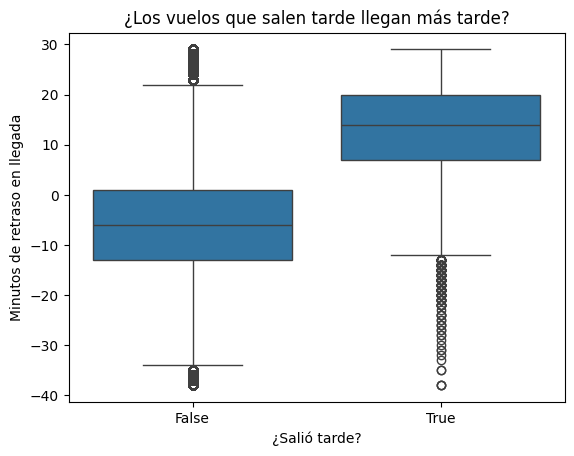


Ruta con más llegadas tarde:
San Francisco International -> Los Angeles International

Ruta con mayor retraso promedio:
Louis Armstrong New Orleans International -> Ronald Reagan Washington National


In [ ]:
# Vuelos que salieron tarde
#df_flights["LateDeparture"] = df_flights["DepDelay"] > 15
#print("\n¿Llegan más tarde si salieron tarde?")
#print(df_flights.groupby("LateDeparture")["ArrDelay"].mean())

#cambio para relacionar arrdelay y depdelay
import seaborn as sns
import matplotlib.pyplot as plt
df_flights["LateDeparture"] = df_flights["DepDelay"] > 15

# Comparar el retraso promedio en llegada según si salió tarde o no
average_arrival_delay = df_flights.groupby("LateDeparture")["ArrDelay"].mean()

print("Retraso promedio en llegada según si el vuelo salió tarde o no:")
print(average_arrival_delay)

# Visualización con gráfico de caja
sns.boxplot(x="LateDeparture", y="ArrDelay", data=df_flights)
plt.title("¿Los vuelos que salen tarde llegan más tarde?")
plt.xlabel("¿Salió tarde?")
plt.ylabel("Minutos de retraso en llegada")
plt.show()

##  Análisis de rutas

#Se construye la columna `Route`, que combina el aeropuerto de origen y destino. Con esto se determina:
# La **ruta con más llegadas tarde**, usando la columna `ArrDelay15`.
# La **ruta con mayor retraso promedio en llegada**, usando `ArrDelay`.
# Se visualizan los tramos más conflictivos y se identifican oportunidades para mejorar la puntualidad.

df_flights["Route"] = df_flights["OriginAirportName"] + " -> " + df_flights["DestAirportName"]

print("\nRuta con más llegadas tarde:")
print(df_flights.groupby("Route")["ArrDelay15"].sum().idxmax())

print("\nRuta con mayor retraso promedio:")
print(df_flights.groupby("Route")["ArrDelay"].mean().idxmax())



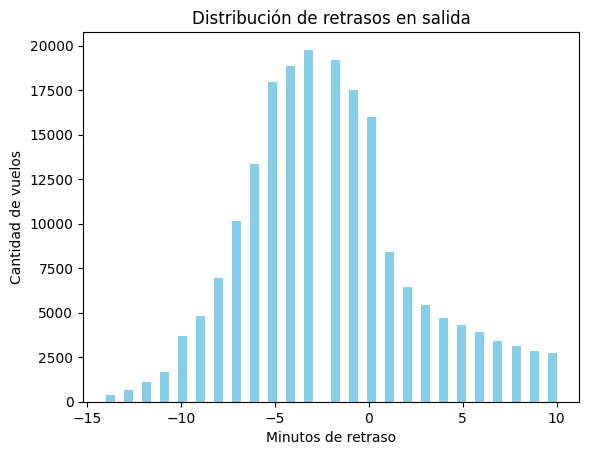

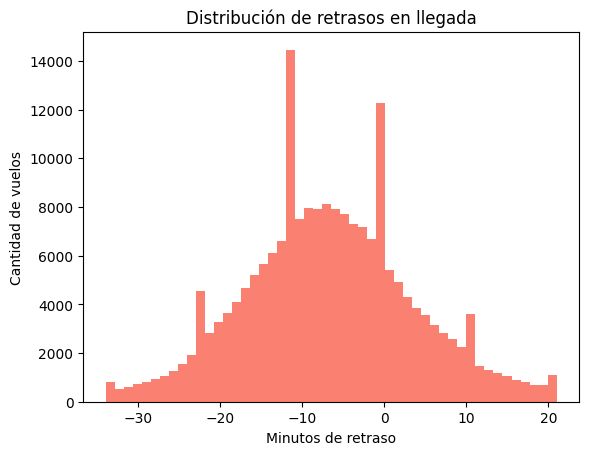

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df_flights["DepDelay"], bins=50, color='skyblue')
plt.title("Distribución de retrasos en salida")
plt.xlabel("Minutos de retraso")
plt.ylabel("Cantidad de vuelos")
plt.show()

plt.hist(df_flights["ArrDelay"], bins=50, color='salmon')
plt.title("Distribución de retrasos en llegada")
plt.xlabel("Minutos de retraso")
plt.ylabel("Cantidad de vuelos")
plt.show()


## Conclusión del analisis

El análisis reveló que:

- El retraso promedio de llegada fue **negativo**, lo que indica que muchos vuelos llegaron antes de lo programado.
- Algunas aerolíneas presentan mejor puntualidad que otras.
- Los días sábado y domingo muestran mayores variaciones en los retrasos.
- Los vuelos que **salen tarde también tienden a llegar más tarde**.
- Hay rutas y aeropuertos específicos donde se concentran los mayores retrasos.


